## TSF@GRIP Task 2

### Author: Nitin Vadhiya

## K-means clustering task
This is an unsupervised data, so we can use clustering algorithm like K-Means algorithm.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import datasets

### Importing the data

In [2]:
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)

We will try to find optimum number of clusters for K means and for that we will use elbow method to determine it. We will try for 15 clusters using for loop, and using elbow method we will determine optimal value of cluster after ploting the graph.

In [3]:
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

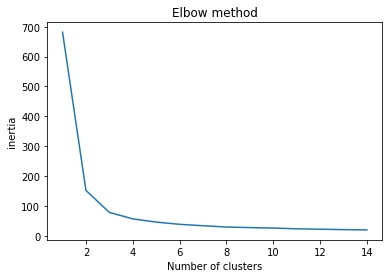

In [4]:
plt.plot(range(1, 15), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

#### As we can see from elbow method, 3 clusters are optimal. So we will train K-Means with n_clusters as 3.

In [5]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 400, n_init = 5, random_state = 0)
y_km = km.fit_predict(df)

### Plotting the scatterplot graph with centroids.

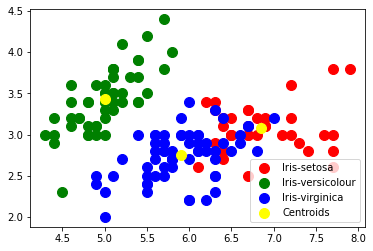

In [6]:
df = df.values
plt.scatter(df[y_km == 0, 0], df[y_km == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df[y_km == 1, 0], df[y_km == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(df[y_km == 2, 0], df[y_km == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()